# NAME: DANIEL JIMENEZ
# PID: 6388332
## WEARABLE TECHNOLOGY DATABASE

# Organize and Clean

The code you provided is used to import necessary modules and functions for working with Apache Spark DataFrames in a PySpark environment.

- `from pyspark.sql import SparkSession`: This line imports the `SparkSession` class from the `pyspark.sql` module. `SparkSession` is the entry point to programming Spark with the DataFrame API. It's used to create a `SparkSession` instance, which provides a way to interact with Spark functionalities such as reading data, performing transformations, and executing SQL queries.

- `import pyspark.sql.functions as F`: This line imports the `pyspark.sql.functions` module and aliases it as `F` for convenience. The `functions` module provides a wide range of built-in functions for various operations on Spark DataFrames, such as mathematical calculations, string manipulation, date and time operations, and more. By importing it as `F`, you can easily access these functions with the prefix `F.`, like `F.col`, `F.sum`, `F.avg`, etc.



In [3]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

The line spark = SparkSession.builder.appName("WearablesAnalysis").getOrCreate() is used to create a SparkSession object in a PySpark application

In [4]:
spark = SparkSession.builder.appName("WearablesAnalysis").getOrCreate()


The line df = spark.read.csv("C:\\Users\\danie\\Downloads\\data\\Wearables-DFE.csv", header=True, inferSchema=True) is used to read a CSV file into a Spark DataFrame in a PySpark application.

In [8]:
df = spark.read.csv("C:\\Users\\danie\\Downloads\\data\\Wearables-DFE.csv", header=True, inferSchema=True)

The df.show() method is used to display the first few rows of a Spark DataFrame in a tabular format. By default, it shows the first 20 rows of the DataFrame.

In [4]:
df.show() 

+--------------------+------+-------------+-------------+-------------------+--------------------+------------------------+-------------+----------------+---------------+--------------+--------------------+-----------------+---+--------------------+
|                name| price|body_location|     category|       company_name|         company_url|company_mapping_location| company_city|company_us_state|company_country|        source|                link|duplicates_note_1| id|               image|
+--------------------+------+-------------+-------------+-------------------+--------------------+------------------------+-------------+----------------+---------------+--------------+--------------------+-----------------+---+--------------------+
|"Garmin Forerunne...|129.99|        Wrist|      Fitness|             Garmin|http://www.garmin...|    Olathe, Kansas, U...|       Olathe|          Kansas|  United States|Google Results|https://www.googl...|             null|542|data:image/jpeg;b...|


The df.printSchema() method is used to display the schema of a Spark DataFrame. The schema shows the structure of the DataFrame, including the names of the columns, their data types, and whether they can contain null values.

In [5]:
df.printSchema() 

root
 |-- name: string (nullable = true)
 |-- price: double (nullable = true)
 |-- body_location: string (nullable = true)
 |-- category: string (nullable = true)
 |-- company_name: string (nullable = true)
 |-- company_url: string (nullable = true)
 |-- company_mapping_location: string (nullable = true)
 |-- company_city: string (nullable = true)
 |-- company_us_state: string (nullable = true)
 |-- company_country: string (nullable = true)
 |-- source: string (nullable = true)
 |-- link: string (nullable = true)
 |-- duplicates_note_1: string (nullable = true)
 |-- id: integer (nullable = true)
 |-- image: string (nullable = true)



 performs a series of operations to rename columns and standardize their names in a Spark DataFrame.

In [6]:
from pyspark.sql.functions import col
df = df.withColumnRenamed("Company...Mapping.Location", "Company_Mapping_Location")
df = df.withColumnRenamed("Company...City", "Company_City")
df = df.withColumnRenamed("Company...U.S..State", "Company_US_State")
df = df.withColumnRenamed("Company...Country", "Company_Country")
df = df.withColumnRenamed("Body.Location", "Body_Location")
df = df.withColumnRenamed("Company.Name", "Company_Name")
df = df.withColumnRenamed("Company.URL", "Company_URL")
df = df.withColumnRenamed("Duplicates.note.1", "Duplicates_note_1")
df = df.select([col(col_name).alias(col_name.strip()) for col_name in df.columns])
df = df.select([col(col_name).alias(col_name.lower().replace(" ", "_")) for col_name in df.columns])

The line df = df.dropna(subset=["price", "category"]) is used to remove rows from the Spark DataFrame df where there are missing values (nulls) in either the "price" column or the "category" column.

In [7]:
df = df.dropna(subset=["price", "category"])


used to clean and convert the "price" column in a Spark DataFrame df to a numeric type (DoubleType).
this line cleans the "price" column by removing non-numeric characters and then converts the cleaned column to a numeric data type (DoubleType), which is useful for performing numerical operations and analysis on the price data.

In [8]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import regexp_replace
df = df.withColumn("price", regexp_replace("price", "[^0-9.]", "").cast(DoubleType()))


performs a series of filtering and deduplication operations on a Spark DataFrame df.
Overall, these lines of code clean and refine the DataFrame by removing rows with missing or invalid price values, eliminating duplicates based on specific columns, and filtering out rows with excessively high prices. This can be useful for preparing the data for analysis or modeling by ensuring that it meets certain criteria and reducing redundancy.

In [9]:
df = df.filter(df["price"].isNotNull() & (df["price"] >= 0))
df = df.dropDuplicates(["name", "category", "company_name"])
df = df.filter(df["price"] < 10000) 

iterates through all the columns of a Spark DataFrame df and trims leading and trailing whitespace from string-type columns.

In [10]:
from pyspark.sql.functions import trim
from pyspark.sql.types import StringType
for col_name in df.columns:
    if df.schema[col_name].dataType == StringType():
        df = df.withColumn(col_name, trim(col(col_name)))

# Analyzing and techniques

performs a series of operations to clean and convert the 'price' column in a Spark DataFrame df. Here's a breakdown of what each line does:

from pyspark.sql.functions import regexp_replace: This imports the regexp_replace function from the pyspark.sql.functions module. The regexp_replace function is used to replace substrings in a column that match a regular expression pattern with a specified replacement string.

df = df.withColumn("price", regexp_replace("price", "[^\d.]", "")): This line uses the regexp_replace function to remove any characters from the 'price' column that are not digits (\d) or a decimal point (.). The regular expression pattern [^\d.] matches any character that is not a digit or a decimal point, and the replacement string "" indicates that these characters should be removed. This effectively removes currency symbols, commas, and any other non-numeric characters from the 'price' column.

df = df.withColumn("price", col("price").cast(DoubleType())): This line casts the cleaned 'price' column to a double-precision floating-point number (DoubleType). This converts the column from a string type to a numeric type, which is useful for performing numerical operations and analysis on the price data.

df.select("price").distinct().show(): This line displays the distinct values in the cleaned and casted 'price' column. It uses the select method to create a new DataFrame containing only the 'price' column, then the distinct method to remove duplicate values, and finally the show method to display the results.

Overall, these lines of code clean the 'price' column by removing non-numeric characters and then convert the cleaned column to a numeric data type (DoubleType), which is useful for performing numerical operations and analysis on the price data.

In [12]:
from pyspark.sql.functions import regexp_replace

# Remove currency symbols and commas from the 'price' column
df = df.withColumn("price", regexp_replace("price", "[^\d.]", ""))

# Cast the cleaned 'price' column to double
df = df.withColumn("price", col("price").cast(DoubleType()))

# Show distinct cleaned and casted values in the 'price' column
df.select("price").distinct().show()

+------+
| price|
+------+
| 299.0|
|199.97|
|169.99|
| 169.0|
|  45.3|
|  9.49|
| 92.95|
|166.95|
| 89.88|
| 37.68|
| 45.45|
| 55.69|
| 249.0|
|291.99|
| 24.78|
|169.95|
| 93.36|
| 26.95|
| 67.62|
| 17.79|
+------+
only showing top 20 rows




The line df = df.drop("unnecessary_column") is used to remove a column named "unnecessary_column" from a Spark DataFrame df. After this operation, the DataFrame df will no longer contain the column "unnecessary_column", and any subsequent operations on df will be performed without considering that column.

In [13]:
df = df.drop("unnecessary_column")

In [14]:
df.show()

+--------------------+------+-------------+------------------+------------+--------------------+------------------------+------------+----------------+---------------+--------------+--------------------+-----------------+---+--------------------+
|                name| price|body_location|          category|company_name|         company_url|company_mapping_location|company_city|company_us_state|company_country|        source|                link|duplicates_note_1| id|               image|
+--------------------+------+-------------+------------------+------------+--------------------+------------------------+------------+----------------+---------------+--------------+--------------------+-----------------+---+--------------------+
|"Garmin Forerunne...|249.99|        Wrist|         Lifestyle|      Garmin|http://www.garmin...|    Olathe, Kansas, U...|      Olathe|          Kansas|  United States|Google Results|https://www.googl...|             null|517|data:image/jpeg;b...|
|"Garmin For

The line print("Total rows:", df.count()) is used to print the total number of rows in a Spark DataFrame df. 

In [16]:
print("Total rows:", df.count())

Total rows: 358


In [17]:
print("Body.Location:", df.select("Name").distinct().count())

Body.Location: 358


The line df.groupBy("Category").count().show() is used to group the rows in a Spark DataFrame df by the "Category" column and count the number of rows in each category. 

In [18]:
df.groupBy("Category").count().show()

+------------------+-----+
|          Category|count|
+------------------+-----+
|            Gaming|    1|
|     Entertainment|   29|
|           Fitness|  179|
|        Industrial|    2|
|  Pets and Animals|    3|
|         Lifestyle|  120|
|Lifestyle, Fitness|    3|
|           Medical|   21|
+------------------+-----+



Shows highest price

In [19]:
df.orderBy(F.desc("Price")).select("Name", "Price").show(1)


+--------------------+------+
|                Name| Price|
+--------------------+------+
|Polar CS600X GPS ...|2495.0|
+--------------------+------+
only showing top 1 row



Shows Lowest price

In [20]:
from pyspark.sql import functions as F
# Find the minimum price
min_price = df.agg(F.min("Price").alias("min_price")).collect()[0]["min_price"]

# Find the object(s) with the minimum price
df.filter(F.col("Price") == min_price).select("Name", "Price").show()

+--------------------+-----+
|                Name|Price|
+--------------------+-----+
|Insten Mini Digit...| 3.99|
+--------------------+-----+



The line df.groupBy("Company_Name").agg(F.avg("Price").alias("average_price")).show() is used to calculate the average price for each company in a Spark DataFrame df.

df.groupBy("Company_Name"): This uses the groupBy method of the DataFrame object to group the rows based on the values in the "Company_Name" column. It returns a GroupedData object, which can be used for aggregating the grouped data.

.agg(F.avg("Price").alias("average_price")): This aggregates the grouped data by calculating the average of the "Price" column for each group (i.e., each company). The F.avg function computes the average, and the alias method is used to name the resulting column "average_price".

.show(): This displays the result of the aggregation. The output will be a DataFrame with two columns: "Company_Name" and "average_price". The "Company_Name" column will contain the distinct company names from the original "Company_Name" column, and the "average_price" column will contain the average price for each company.

In [21]:
df.groupBy("Company_Name").agg(F.avg("Price").alias("average_price")).show()

+-------------+------------------+
| Company_Name|     average_price|
+-------------+------------------+
|       Belkin|             24.99|
|      Scosche|             34.98|
|       Papago| 86.83333333333333|
|      Martian|            280.25|
|       Striiv|             77.99|
|         Nike|            59.495|
|Xtreme Cables|             49.99|
|       Suunto|             265.0|
| Liquid Image|            299.99|
|      X-Doria|              39.0|
|          Mio|165.65666666666667|
|     Magellan|          131.3925|
|    Accusplit|             76.99|
|         Sony|118.65166666666669|
|        Casio|            46.568|
|    Monoprice| 83.55333333333334|
|         Mota|           73.6125|
|     Motorola|            169.99|
|     Freehand|            322.58|
|     Lifetrak|           55.2825|
+-------------+------------------+
only showing top 20 rows



the rows in a Spark DataFrame df based on the "Price" column and then selects specific columns to display.
threshold = 100: This sets a variable threshold to a value of 100. This value will be used as a threshold for filtering the DataFrame.

df.filter(df["Price"] > threshold): This uses the filter method of the DataFrame object to filter the rows where the value in the "Price" column is greater than the threshold (in this case, 100). The result is a new DataFrame containing only the rows that meet this condition.

.select("Name", "Price"): This uses the select method to create a new DataFrame that includes only the "Name" and "Price" columns from the filtered DataFrame.

.show(): This displays the first 20 rows of the resulting DataFrame. It shows the names and prices of the products that have a price greater than 100.

In [22]:
threshold = 100
df.filter(df["Price"] > threshold).select("Name", "Price").show()

+--------------------+------+
|                Name| Price|
+--------------------+------+
|Samsung Galaxy Ge...|199.99|
|Golf Buddy VT3 Bl...|199.99|
|Martian Watches V...| 299.0|
|POV Action Video ...|149.95|
|Withings Pulse O2...|119.99|
|Cogito Classic - ...|179.95|
|MIDLAND XTC285VP ...|121.99|
|Garmin VIRB Elite...|249.99|
|Samsung Gear2 Neo...|199.99|
|Garmin Forerunner...|129.99|
|Shippingsmart bra...| 125.0|
|Sony HDR-AS30V Di...|179.99|
|Martian Watches P...| 299.0|
|Garmin 010-N0863-...|209.11|
|"LG Lifeband Touc...|126.99|
|  Freehand Glove Kit|322.58|
|Pebble - Steel Sm...|199.99|
|Samsung Gear S in...|349.99|
|Jawbone - Up - Ac...|112.99|
|LG LGW100-AUSAKT ...|149.99|
+--------------------+------+
only showing top 20 rows



the rows in a Spark DataFrame df by the "Company_Country" column, counts the number of rows in each group, and then orders the results in descending order based on the count.

df.groupBy("Company_Country"): This uses the groupBy method of the DataFrame object to group the rows based on the values in the "Company_Country" column. It returns a GroupedData object, which can be used for aggregating the grouped data.

.count(): This is called on the GroupedData object returned by groupBy. It aggregates the grouped data by counting the number of rows in each group (i.e., each country).

.orderBy(F.desc("count")): This orders the aggregated results in descending order based on the "count" column. The F.desc function is used to specify descending order.

.show(): This displays the result of the aggregation and ordering. The output will be a DataFrame with two columns: "Company_Country" and "count". The "Company_Country" column will contain the distinct country names from the original "Company_Country" column, and the "count" column will contain the number of rows corresponding to each country, ordered from the highest count to the lowest.

In [23]:
df.groupBy("Company_Country").count().orderBy(F.desc("count")).show()


+---------------+-----+
|Company_Country|count|
+---------------+-----+
|  United States|  256|
|          Japan|   33|
|    South Korea|   26|
|         Taiwan|    8|
|           null|    8|
|          China|    8|
|        Austria|    5|
|    Netherlands|    4|
|         France|    3|
|        Finland|    3|
|         Canada|    3|
|          Italy|    1|
+---------------+-----+



the rows in a Spark DataFrame df by the "Category" column, counts the number of rows in each group, and then orders the results in descending order based on the count. Finally, it displays the top 5 categories with the highest counts.

In [24]:
df.groupBy("Category").count().orderBy(F.desc("count")).show(5)


+----------------+-----+
|        Category|count|
+----------------+-----+
|         Fitness|  179|
|       Lifestyle|  120|
|   Entertainment|   29|
|         Medical|   21|
|Pets and Animals|    3|
+----------------+-----+
only showing top 5 rows



the rows in a Spark DataFrame df by the "Body_Location" column, counts the number of rows in each group, and then orders the results in descending order based on the count. This displays the result of the aggregation and ordering. The output will be a DataFrame with two columns: "Body_Location" and "count". The "Body_Location" column will contain the distinct body location names from the original "Body_Location" column, and the "count" column will contain the number of rows corresponding to each body location, ordered from the highest count to the lowest

In [25]:
df.groupBy("Body_Location").count().orderBy(F.desc("count")).show()

+-------------+-----+
|Body_Location|count|
+-------------+-----+
|        Wrist|  267|
|         Head|   29|
|        Waist|   20|
|        Chest|   19|
|         Neck|    6|
|        Hands|    5|
|        Torso|    5|
|         Arms|    4|
|         Feet|    3|
+-------------+-----+



filters the rows in a Spark DataFrame df based on whether the "Name" column contains a specific keyword ("Fitness" in this case) and then selects the "Name" and "Category" columns to display. This shows the names and categories of the products that have the word "Fitness" in their names, which can be useful for identifying specific types of products or analyzing trends related to fitness products.

In [26]:
keyword = "Fitness"
df.filter(df["Name"].contains(keyword)).select("Name", "Category").show()

+--------------------+--------+
|                Name|Category|
+--------------------+--------+
|Barska GB12166 Fi...| Fitness|
|X-doria KidFit / ...| Fitness|
|Garmin - v�_vofit...| Fitness|
|Jawbone UP Fitnes...| Fitness|
|Misfit Wearables ...| Fitness|
|Magellan Echo Fit...| Fitness|
|Garmin Vivofit Fi...| Fitness|
|Jawbone UP Fitnes...| Fitness|
|Garmin Vivofita,,...| Fitness|
|TomTom Fitness Co...| Fitness|
|Garmin Vivofit Fi...| Fitness|
|Garmin Vivofita,,...| Fitness|
|Polar Loop Activi...| Fitness|
|Jawbone UP24 Oran...| Fitness|
|Pyle PSBTFS40 Blu...| Fitness|
|Jawbone UP Fitnes...| Fitness|
|010-01225-38, GAR...| Fitness|
|LifeTrak C200 Cor...| Fitness|
|Garmin Vivofit Fi...| Fitness|
|Magellan Echo Fit...| Fitness|
+--------------------+--------+
only showing top 20 rows



The code you provided groups the rows in a Spark DataFrame df by the "Category" column, calculates the average price for each category, and then orders the results in descending order based on the average price. This displays the result of the aggregation and ordering. The output will be a DataFrame with two columns: "Category" and "average_price". The "Category" column will contain the distinct category names from the original "Category" column, and the "average_price" column will contain the average price for each category, ordered from the highest average price to the lowest.

In [27]:
df.groupBy("Category").agg(F.avg("Price").alias("average_price")).orderBy(F.desc("average_price")).show()

+------------------+------------------+
|          Category|     average_price|
+------------------+------------------+
|         Lifestyle| 134.9269166666666|
|           Fitness| 126.3767039106147|
|     Entertainment|126.15965517241376|
|           Medical|  89.0157142857143|
|            Gaming|             81.87|
|  Pets and Animals| 70.42333333333333|
|Lifestyle, Fitness|             35.72|
|        Industrial|20.845000000000002|
+------------------+------------------+



performs a series of operations to split the contents of the "Name" column in a Spark DataFrame df into individual words, count the occurrences of each word, and display the words in descending order of their frequency.
from pyspark.sql.functions import explode, split: This imports the explode and split functions from the pyspark.sql.functions module. The split function is used to split a string into an array of substrings based on a delimiter, and the explode function is used to transform each element of an array into a separate row.

df.withColumn("word", explode(split(F.col("Name"), "\s+"))): This line adds a new column "word" to the DataFrame df. The split function splits the "Name" column into an array of words using one or more whitespace characters ("\s+") as the delimiter. The explode function then transforms each word in the array into a separate row.

.groupBy("word"): This groups the resulting rows by the "word" column.

.count(): This counts the number of rows in each group, which gives the frequency of each word.

.orderBy(F.desc("count")): This orders the results in descending order based on the "count" column, so the most frequent words appear first.

.show(): This displays the first 20 rows of the resulting DataFrame, which contains the words and their frequencies.

In [28]:
from pyspark.sql.functions import explode, split

df.withColumn("word", explode(split(F.col("Name"), "\s+"))) \
  .groupBy("word") \
  .count() \
  .orderBy(F.desc("count")) \
  .show()

+---------+-----+
|     word|count|
+---------+-----+
|        -|  287|
|    Heart|   85|
|     Rate|   78|
|    Watch|   58|
|  Monitor|   56|
|    Polar|   54|
| Activity|   47|
|    Black|   46|
|     with|   38|
|   Garmin|   35|
|      GPS|   35|
|  Fitness|   28|
|      for|   26|
|Bluetooth|   26|
|  tracker|   24|
|      and|   22|
|    Smart|   22|
|     Band|   21|
|   Action|   21|
|    Casio|   20|
+---------+-----+
only showing top 20 rows



converts a Spark DataFrame df to a Pandas DataFrame pdf, groups the data by the "Category" column, and then plots histograms of the "Price" distribution for each category. The result is a series of histograms, each showing the distribution of prices for a different category in the dataset. This can be useful for visualizing and comparing the price distributions across different categories.

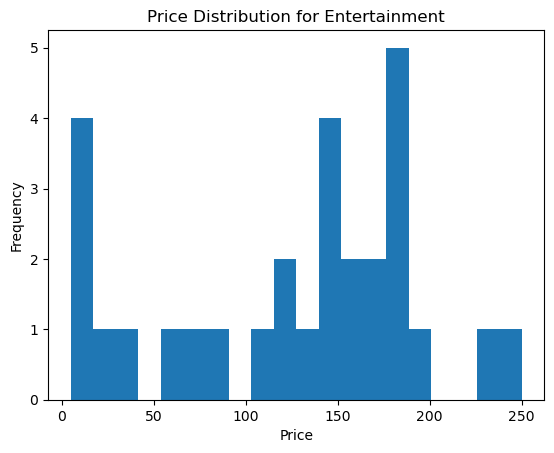

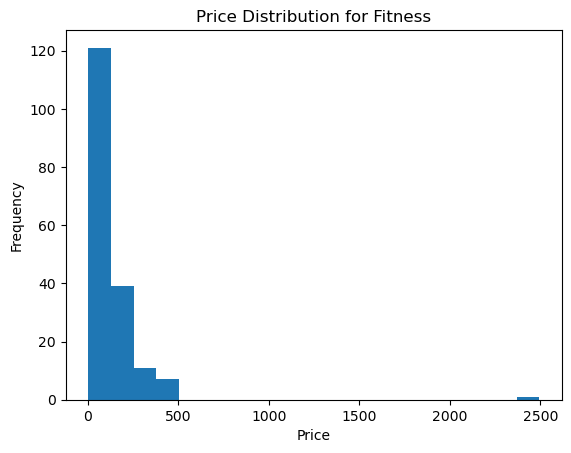

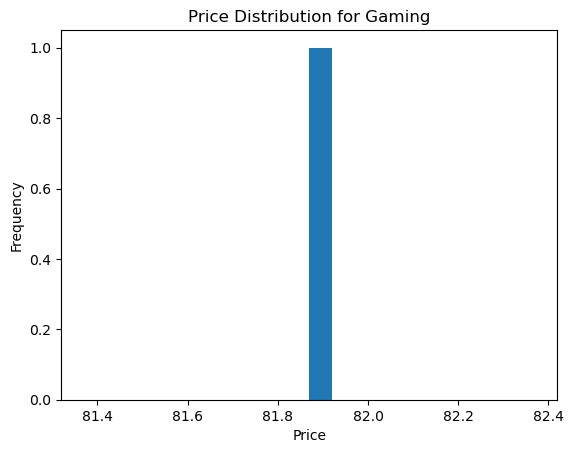

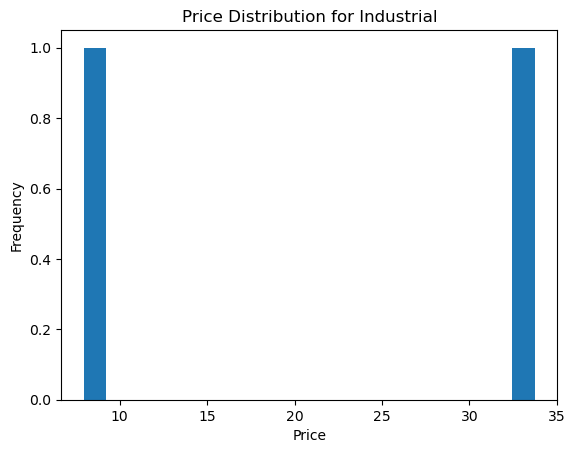

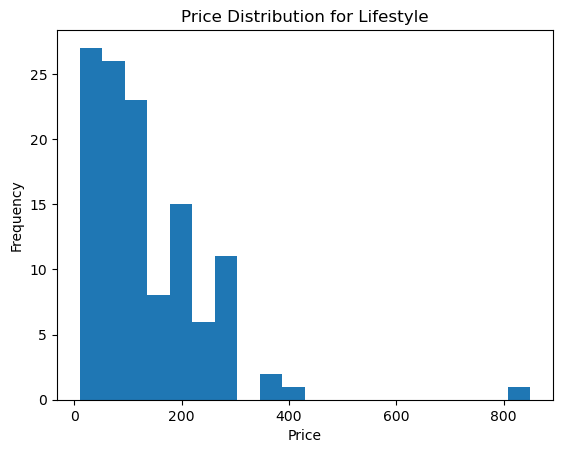

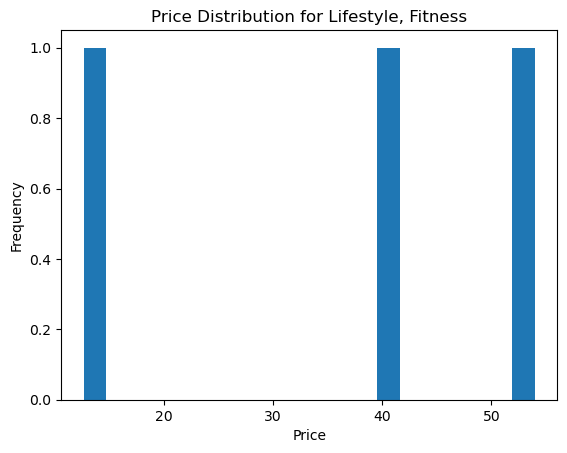

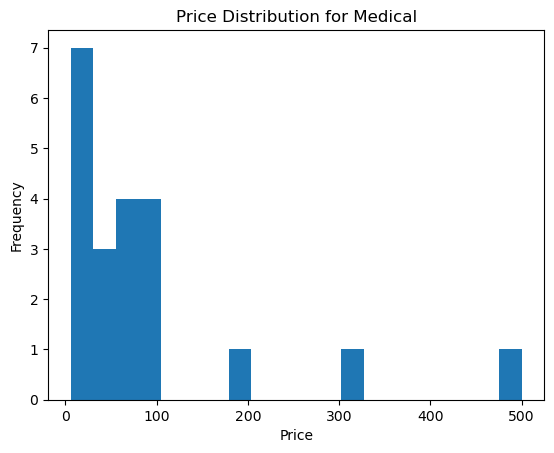

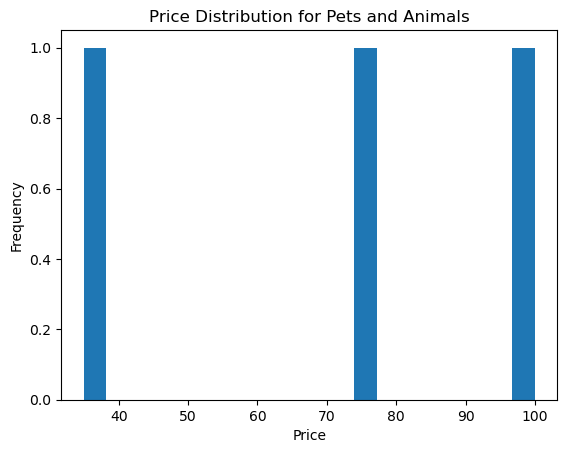

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the Spark DataFrame to a Pandas DataFrame
pdf = df.select("Category", "Price").toPandas()

# Group the data by category and plot the histograms
for category_name, group in pdf.groupby("Category"):
    plt.hist(group["Price"], bins=20)
    plt.title(f"Price Distribution for {category_name}")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()